# Building a CNN Model

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Import the Conv2D and Flatten layers and instantiate model
from tensorflow.keras.layers import Conv2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Import image and preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.efficientnet import decode_predictions

In [2]:
model = Sequential()

# add an input shape that takes the total no of pixels for each 28x28 image that have one channel (black and white)
model.add(Input(shape=(28,28,1)))

# add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(32, kernel_size=3, activation='relu'))

# add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size=3, activation='relu'))

# flatten the previous layer output
model.add(Flatten())

# add as many outputs as classes with softmax activation
model.add(Dense(10, activation='softmax'))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


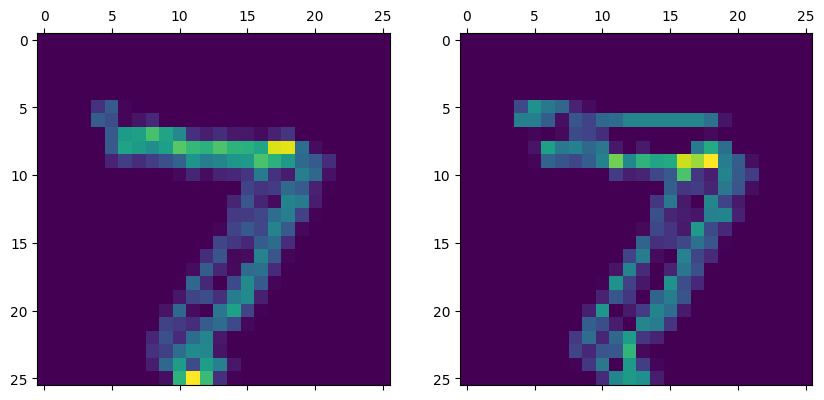

In [3]:
# obtain a reference to the outputs of the first layer
first_layer_output = model.layers[0].output

# build a model using the model's input and the first layer output
first_layer_model = Model(inputs=model.layers[0].input, outputs=first_layer_output)

# load X_test
X_test = np.load('data/MNIST/X_test_MNIST.npy')
# reshape X_test
X_test = X_test.reshape(-1, 28, 28, 1)
# normalize X_test
X_test = X_test / 255.0

# use this model to predict on X_test
activations = first_layer_model.predict(X_test)

# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot the activations of first digit of X_test for the 15th filter
axs[0].matshow(activations[0,:,:,14], cmap='viridis')

# do the same for the 18th filter
axs[1].matshow(activations[0,:,:,18], cmap='viridis')

plt.show()


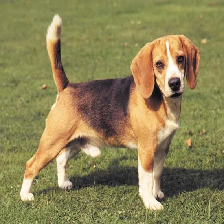

In [16]:
# Load the image with the right target size for your model
img = image.load_img('data/MNIST/Beagle.webp', target_size=(224, 224))
img

In [17]:
# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)
img_ready

array([[[[-20.939003  ,   5.2210007 ,  -8.68      ],
         [-20.939003  ,   5.2210007 ,  -8.68      ],
         [-19.939003  ,   6.2210007 ,  -7.6800003 ],
         ...,
         [-15.939003  ,  19.221     ,  11.32      ],
         [-15.939003  ,  19.221     ,  11.32      ],
         [-15.939003  ,  19.221     ,  11.32      ]],

        [[-22.939003  ,   5.2210007 ,  -8.68      ],
         [-22.939003  ,   5.2210007 ,  -8.68      ],
         [-20.939003  ,   7.2210007 ,  -5.6800003 ],
         ...,
         [-17.939003  ,  18.221     ,   7.3199997 ],
         [-17.939003  ,  18.221     ,   7.3199997 ],
         [-17.939003  ,  18.221     ,   7.3199997 ]],

        [[-27.939003  ,   4.2210007 ,  -7.6800003 ],
         [-27.939003  ,   4.2210007 ,  -7.6800003 ],
         [-24.939003  ,   8.221001  ,  -5.6800003 ],
         ...,
         [-22.939003  ,  12.221001  ,   4.3199997 ],
         [-25.939003  ,   9.221001  ,   1.3199997 ],
         [-25.939003  ,   9.221001  ,   1.3199997 ]],

In [18]:
# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n02088364', 'beagle', 0.9053024), ('n02089973', 'English_foxhound', 0.079993635), ('n02089867', 'Walker_hound', 0.011760719)]


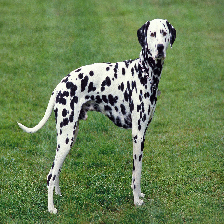

In [25]:
# Load the image with the right target size for your model
img2 = image.load_img('data/MNIST/Dalmatian.webp', target_size=(224, 224))
img2

In [26]:
# Turn it into an array
img_array = image.img_to_array(img2)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)
img_ready

array([[[[-28.939003  ,  13.221001  , -20.68      ],
         [-20.939003  ,  22.221     , -14.68      ],
         [-23.939003  ,  23.221     , -11.68      ],
         ...,
         [-21.939003  ,   6.2210007 , -27.68      ],
         [-25.939003  ,   4.2210007 , -27.68      ],
         [-23.939003  ,   8.221001  , -24.68      ]],

        [[-26.939003  ,  15.221001  , -18.68      ],
         [-31.939003  ,  20.221     , -17.68      ],
         [-26.939003  ,  19.221     , -15.68      ],
         ...,
         [-29.939003  ,   0.22100067, -27.68      ],
         [-35.939003  ,   1.2210007 , -31.68      ],
         [-23.939003  ,   6.2210007 , -25.68      ]],

        [[-46.939003  ,   6.2210007 , -29.68      ],
         [-40.939003  ,   7.2210007 , -25.68      ],
         [-37.939003  ,  12.221001  , -20.68      ],
         ...,
         [-21.939003  ,   5.2210007 , -19.68      ],
         [-30.939003  ,  -0.7789993 , -32.68      ],
         [-21.939003  ,   6.2210007 , -25.68      ]],

In [27]:
# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n02110341', 'dalmatian', 0.9989698), ('n02109047', 'Great_Dane', 0.0008016455), ('n02100236', 'German_short-haired_pointer', 3.5256562e-05)]
